{'spInd': 0, 'spVal': 5.0, 'left': {'spInd': 0, 'spVal': 7.0, 'left': {'spInd': 0, 'spVal': 8.0, 'left': {'spInd': 0, 'spVal': 9.0, 'left': 9.0, 'right': 8.7}, 'right': 8.23}, 'right': {'spInd': 0, 'spVal': 6.0, 'left': 7.9, 'right': 7.05}}, 'right': {'spInd': 0, 'spVal': 3.0, 'left': {'spInd': 0, 'spVal': 4.0, 'left': 5.8, 'right': 5.34}, 'right': {'spInd': 0, 'spVal': 1.0, 'left': {'spInd': 0, 'spVal': 2.0, 'left': 4.91, 'right': 4.75}, 'right': 4.5}}}


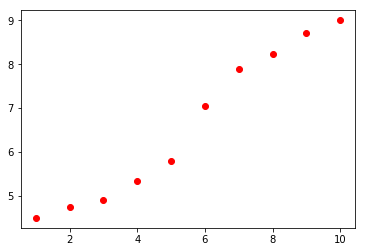

In [11]:
'''
Reference：
[1] https://blog.csdn.net/sinat_17196995/article/details/69621687
[2] GitHub: https://github.com/stonycat/ML-in-Action-Code-and-Note
'''
from numpy import *


# 载入数据
def loadDataSet(fileName):
    dataMat = []
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        # python3不适用：fltLine = map(float,curLine) 修改为：
        fltLine = list(map(float, curLine))  # 将每行映射成浮点数，python3返回值改变，所以需要
        dataMat.append(fltLine)
    return dataMat


# 切分数据集为两个子集
def binSplitDataSet(dataSet, feature, value):  # 数据集 待切分特征 特征值
    mat0 = dataSet[nonzero(dataSet[:, feature] > value)[0], :]
    mat1 = dataSet[nonzero(dataSet[:, feature] <= value)[0], :]
    # 下面原书代码报错 index 0 is out of bounds,使用上面两行代码
    # mat0 = dataSet[nonzero(dataSet[:, feature] > value)[0], :][0]
    # mat1 = dataSet[nonzero(dataSet[:, feature] <= value)[0], :][0]
    return mat0, mat1


# Tree结点类型：回归树
def regLeaf(dataSet):  # 生成叶结点，在回归树中是目标变量特征的均值
    return mean(dataSet[:, -1])


# 误差计算函数：回归误差
def regErr(dataSet):  # 计算目标的平方误差（均方误差*总样本数）
    return var(dataSet[:, -1]) * shape(dataSet)[0]


# 二元切分
def chooseBestSplit(dataSet, leafType=regLeaf, errType=regErr, ops=(0, 1)):
    # 切分特征的参数阈值，用户初始设置好
    tolS = ops[0]  # 允许的误差下降值
    tolN = ops[1]  # 切分的最小样本数
    # 若所有特征值都相同，停止切分
    if len(set(dataSet[:, -1].T.tolist()[0])) == 1:  # 倒数第一列转化成list 不重复
        return None, leafType(dataSet)  # 如果剩余特征数为1，停止切分1。
        # 找不到好的切分特征，调用regLeaf直接生成叶结点
    m, n = shape(dataSet)
    S = errType(dataSet)  # 最好的特征通过计算平均误差
    bestS = inf
    bestIndex = 0
    bestValue = 0
    for featIndex in range(n - 1):  # 遍历数据的每个属性特征
        # for splitVal in set(dataSet[:,featIndex]): python3报错修改为下面
        for splitVal in set((dataSet[:, featIndex].T.A.tolist())[0]):  # 遍历每个特征里不同的特征值
            mat0, mat1 = binSplitDataSet(dataSet, featIndex, splitVal)  # 对每个特征进行二元分类
            if (shape(mat0)[0] < tolN) or (shape(mat1)[0] < tolN): continue
            newS = errType(mat0) + errType(mat1)
            if newS < bestS:  # 更新为误差最小的特征
                bestIndex = featIndex
                bestValue = splitVal
                bestS = newS
    # 如果切分后误差效果下降不大，则取消切分，直接创建叶结点
    if (S - bestS) < tolS:
        return None, leafType(dataSet)  # 停止切分2
    mat0, mat1 = binSplitDataSet(dataSet, bestIndex, bestValue)
    # 判断切分后子集大小，小于最小允许样本数停止切分3
    if (shape(mat0)[0] < tolN) or (shape(mat1)[0] < tolN):
        return None, leafType(dataSet)
    return bestIndex, bestValue  # 返回特征编号和用于切分的特征值


# 构建tree
def createTree(dataSet, leafType=regLeaf, errType=regErr, ops=(0, 1)):
    # 数据集默认NumPy Mat 其他可选参数【结点类型：回归树，误差计算函数，ops包含树构建所需的其他元组】
    feat, val = chooseBestSplit(dataSet, leafType, errType, ops)
    if feat == None: return val  # 满足停止条件时返回叶结点值
    # 切分后赋值
    retTree = {}
    retTree['spInd'] = feat
    retTree['spVal'] = val
    # 切分后的左右子树
    lSet, rSet = binSplitDataSet(dataSet, feat, val)
    retTree['left'] = createTree(lSet, leafType, errType, ops)
    retTree['right'] = createTree(rSet, leafType, errType, ops)
    return retTree

if __name__ == "__main__":
    myDat = mat(loadDataSet('5.2test.txt'))
    print(createTree(myDat))

    # 绘制数据点图
    import matplotlib.pyplot as plt

    plt.plot(myDat[:, 0], myDat[:, 1], 'ro')
    plt.show()